In [1]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt 
from itertools import chain
from wordcloud import WordCloud, STOPWORDS 
from nltk.stem import PorterStemmer
import re

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

%run ./jlu_preprocessing.ipynb
%run ./spk_preprocessing.ipynb

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
# data = pd.read_excel(r'C:/Users/Checkout/Desktop/SJSU/sem1/257-ML/Project/global_warming_tweets.xls')
data = pd.read_csv(r'C:/Users/Checkout/Desktop/SJSU/sem1/257-ML/Project/global_warming_tweets_main.csv', engine='python') #encoding = "cp1252"
data.head()

,tweet,existence,existence.confidence
0,Global warming report urges governments to act...,Yes,1.0000
1,Fighting poverty and global warming in Africa ...,Yes,1.0000
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087


In [4]:
# data[data['existence']=="No"].tweet
data['existence'] = data['existence'].fillna('No')

In [5]:
print(data['existence'].value_counts())

Y      2554
No     1926
N      1053
Yes     557
Name: existence, dtype: int64


In [6]:
data['word_count'] = data['tweet'].apply(lambda x: len(x.split(" ")))
data = data.drop_duplicates()
data = data.dropna()
data.loc[data['existence'] == 'Y','existence'] = "Yes"
data.loc[data['existence'] == 'N','existence'] = "No"
print(data.shape)
data.dropna()
data.loc[data['existence'] == np.nan,'existence'] = "No"
print(data['existence'].value_counts())
print(data.shape)
data.head()

(5960, 4)
Yes    3029
No     2931
Name: existence, dtype: int64
(5960, 4)


,tweet,existence,existence.confidence,word_count
0,Global warming report urges governments to act...,Yes,1.0000,18
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,8
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,12
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,12
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,11


In [7]:
data['tweet']

0       Global warming report urges governments to act...
1       Fighting poverty and global warming in Africa ...
2       Carbon offsets: How a Vatican forest failed to...
3       Carbon offsets: How a Vatican forest failed to...
4       URUGUAY: Tools Needed for Those Most Vulnerabl...
                              ...                        
6084    It's 83•_Á and climbing in NYC. August weather...
6085    @bloodless_coup "The phrase 'global warming' s...
6087    Global warming you tube parody you will enjoy ...
6088    One-Eyed Golfer: Don't dare tell me about glob...
6089    man made global warming a hair brained theory ...
Name: tweet, Length: 4134, dtype: object

In [7]:
tweets = data["tweet"]
# tweets = tweets.drop_duplicates()
tweets

0       Global warming report urges governments to act...
1       Fighting poverty and global warming in Africa ...
2       Carbon offsets: How a Vatican forest failed to...
3       Carbon offsets: How a Vatican forest failed to...
4       URUGUAY: Tools Needed for Those Most Vulnerabl...
                              ...                        
6085    @bloodless_coup "The phrase 'global warming' s...
6086    Virginia to Investigate Global Warming Scienti...
6087    Global warming you tube parody you will enjoy ...
6088    One-Eyed Golfer: Don't dare tell me about glob...
6089    man made global warming a hair brained theory ...
Name: tweet, Length: 5960, dtype: object

In [8]:
# tweets[:100]

In [9]:
# python -m spacy download en_core_web_sm
preprocessed_tweets,indices = preprocess_tweets(tweets)

In [ ]:
# preprocessed_tweets

<AxesSubplot:title={'center':'Tweet Word Count Distribution'}, ylabel='Frequency'>

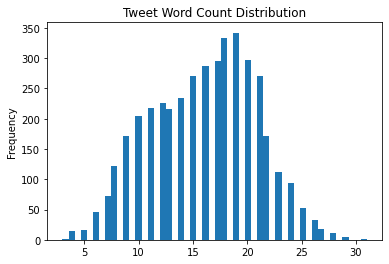

In [13]:
data['word_count'].plot(
    kind='hist',
    xlabel = "Word Count",
    bins=50,
    title='Tweet Word Count Distribution')

           existence.confidence  word_count
existence                                  
No                     840.8694       18845
Yes                   2474.1951       47302


<AxesSubplot:title={'center':'Existence Distribution'}, xlabel='existence'>

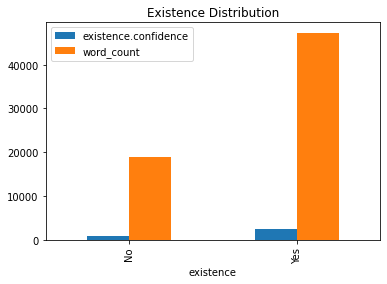

In [14]:
print(data.groupby(by=["existence"]).sum())
data.groupby(by=["existence"]).sum().plot(kind = 'bar',title = "Existence Distribution")

global 2437
warming 2360
climate 2355
change 2155
link 489
retwt 218
snow 217
tcot 187
news 177
science 162
oohja 158
green 150
will 149
earth 131
world 130
report 129
gore 112
time 103
scientists 102
energy 102


,tweet,word_count
0,global,2437
1,warming,2360
2,climate,2355
3,change,2155
4,link,489


<AxesSubplot:title={'center':'Top 20 words in review before preprocessing'}, xlabel='tweet'>

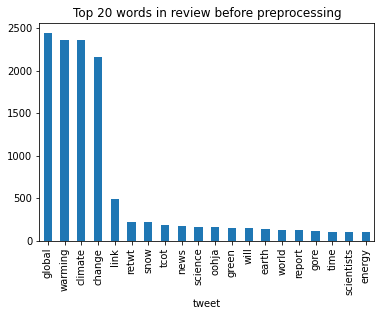

In [15]:
# The distribution of top unigrams before removing stop words
from sklearn.feature_extraction.text import CountVectorizer

common_words = get_top_n_words(data['tweet'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['tweet' , 'word_count'])
display(df1.head())

df1.groupby('tweet').sum()['word_count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review before preprocessing')



<AxesSubplot:title={'center':'Top 20 words in review after preprocessing'}, xlabel='top words'>

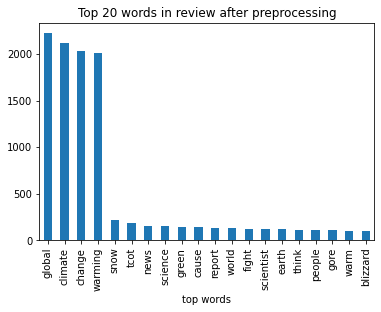

In [16]:
allwords = list(chain.from_iterable(preprocessed_tweets))
df2 = pd.DataFrame(allwords,columns = ["words"])
df2['words'].value_counts()[:20].plot(kind='bar', title='Top 20 words in review after preprocessing',
                                     xlabel = 'top words')
# allwords
# preprocessed_tweets

## Modelling

In [10]:
new_data = data.iloc[indices]

In [11]:
prepr_tweets = [" ".join(each) for each in preprocessed_tweets]
new_data['cleaned_tweet'] = prepr_tweets
new_data.head()

,tweet,existence,existence.confidence,word_count,cleaned_tweet
0,Global warming report urges governments to act...,Yes,1.0000,18,increase urge world report government belgium ...
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,8,fight africa poverty global warming
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,12,offset forest reduce fail global carbon warmin...
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,12,offset forest reduce fail global carbon warmin...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,11,tool vulnerable change need uruguay climate


In [12]:
len(prepr_tweets), data.shape, new_data.shape

(5813, (5960, 4), (5813, 5))

In [13]:
# TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import collections, numpy

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(new_data['cleaned_tweet'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(new_data['cleaned_tweet'].astype('U'))
# print(text_tf)

In [14]:
new_data.isna().sum()

tweet                   0
existence               0
existence.confidence    0
word_count              0
cleaned_tweet           0
dtype: int64

In [15]:
# compute similarity using cosine similarity
cos_sim=cosine_similarity(text_tf, text_tf)
print(cos_sim)

[[1.         0.03202563 0.02152163 ... 0.02098109 0.01983339 0.01605031]
 [0.03202563 1.         0.03771814 ... 0.0367708  0.03475939 0.02812928]
 [0.02152163 0.03771814 1.         ... 0.02471044 0.02335875 0.01890323]
 ...
 [0.02098109 0.0367708  0.02471044 ... 1.         0.02277207 0.01842845]
 [0.01983339 0.03475939 0.02335875 ... 0.02277207 1.         0.01742039]
 [0.01605031 0.02812928 0.01890323 ... 0.01842845 0.01742039 1.        ]]


In [16]:
# splitting data 

X_train, X_test, y_train, y_test = train_test_split(cos_sim, new_data['existence'], test_size=0.2, random_state=33)
print(" Test Data Shape:", X_test.shape)
print(" Train Data Shape:",X_train.shape)

 Test Data Shape: (1163, 5813)
 Train Data Shape: (4650, 5813)


In [17]:
pos = (y_test == 'Yes').sum()
neg = (y_test == 'No').sum()
postrain = (y_train == 'Yes').sum()
negtrain = (y_train == 'No').sum()
total = pos + neg
print(" Test Data Positive Sentiments :", pos)
print(" Test Data Negative Sentiments :",neg)
print(" Train Data Positive Sentiments :", postrain)
print(" Train Data Positive Sentiments :",negtrain)
new_data['existence'].value_counts()

 Test Data Positive Sentiments : 591
 Test Data Negative Sentiments : 572
 Train Data Positive Sentiments : 2385
 Train Data Positive Sentiments : 2265


Yes    2976
No     2837
Name: existence, dtype: int64

In [18]:
# perform algoritma KNN
from sklearn.metrics import accuracy_score, precision_score, auc,recall_score, f1_score,roc_curve,confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC


In [19]:
clfs = [
    svm.SVC(kernel='linear').fit(X_train, y_train),
#     LinearSVC().fit(X_train, y_train),
    DecisionTreeClassifier().fit(X_train, y_train),
    KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
]

In [20]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [21]:
row_index = 0
for clf in clfs:
    print('===============================================\n')
    print("**********{}***********".format(clf.__class__.__name__))
    predicted = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
    MLA_name = clf.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(clf.score(X_train, y_train), 2)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round( accuracy_score(y_test,predicted), 2)
    MLA_compare.loc[row_index, 'MLA Precision'] = round( precision_score(y_test,predicted, average="binary", pos_label="Yes"), 2)
    MLA_compare.loc[row_index, 'MLA Recall'] = round( recall_score(y_test,predicted, average="binary", pos_label="Yes"), 2)
    MLA_compare.loc[row_index, 'MLA F1 Score'] = round( f1_score(y_test,predicted, average="binary", pos_label="Yes"), 2)
    MLA_compare.loc[row_index, 'error_rate'] = round( 1-accuracy_score(y_test,predicted), 2)
#     MLA_compare.loc[row_index, 'cross val score'] = cross_val_score(clf, cos_sim,data['existence'], cv=10).mean()
    row_index+=1



**********SVC***********

**********DecisionTreeClassifier***********

**********KNeighborsClassifier***********


In [22]:
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precision,MLA Recall,MLA F1 Score,error_rate
0,SVC,0.87,0.73,0.72,0.74,0.73,0.27
2,KNeighborsClassifier,0.75,0.68,0.75,0.54,0.63,0.32
1,DecisionTreeClassifier,0.96,0.67,0.69,0.66,0.67,0.33


<!-- ## SVM
* Train Accuracy:-  0.92
* Test Accuracy:-  0.82
* Precision Score:-  0.85
* Recall:-  0.91
* F1 score:-  0.88
* Error Report:-  0.18

## DecisionTreeClassifier
* Train Accuracy:-  0.98
* Test Accuracy:-  0.79
* Precision Score:-  0.85
* Recall:-  0.86
* F1 score:-  0.85
* Error Report:-  0.21

## KNeighborsClassifier
* Train Accuracy:-  0.85
* Test Accuracy:-  0.77
* Precision Score:-  0.83
* Recall:-  0.86
* F1 score:-  0.85
* Error Report:-  0.23
 -->